In [104]:
import requests
import json
import time
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as  plt

In [105]:
start_time = '1657537200'
end_time = '1657548000'

In [115]:
result = json.loads(requests.get('http://172.16.2.95:9090/api/v1/query_range?query=100+-+rate%28node_cpu_seconds_total%7Bmode%3D%22idle%22%7D%5B1m%5D%29+*+100&start='+start_time+'&end='+end_time+'&step=1').text)
data = result['data']['result'][0]['values']

In [116]:
data_1 = [[time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(i[0])),i[1]] for i in data]

In [117]:
df=pd.DataFrame(data_1,columns=['ds','y'])
df

,ds,y
0,2022-07-11 15:00:00,82.5999999999873
1,2022-07-11 15:00:01,82.5999999999873
2,2022-07-11 15:00:02,82.5999999999873
3,2022-07-11 15:00:03,82.5999999999873
4,2022-07-11 15:00:04,82.5999999999873
...,...,...
10796,2022-07-11 17:59:56,66.56363636366389
10797,2022-07-11 17:59:57,66.56363636366389
10798,2022-07-11 17:59:58,66.56363636366389
10799,2022-07-11 17:59:59,66.56363636366389


In [1]:
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=1000, freq='1s')
fcst = m.predict(future)
fig = m.plot(fcst)

NameError: name 'Prophet' is not defined

In [132]:
fcst[-300:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10801,2022-07-11 18:00:01,68.161681,53.163684,83.911193,68.161681,68.161681,0.0,0.0,0.0,0.0,0.0,0.0,68.161681
10802,2022-07-11 18:00:02,68.164285,53.912025,82.685464,68.164285,68.164285,0.0,0.0,0.0,0.0,0.0,0.0,68.164285
10803,2022-07-11 18:00:03,68.166889,52.469078,83.167991,68.166889,68.166889,0.0,0.0,0.0,0.0,0.0,0.0,68.166889
10804,2022-07-11 18:00:04,68.169492,53.722699,84.064875,68.169492,68.169492,0.0,0.0,0.0,0.0,0.0,0.0,68.169492
10805,2022-07-11 18:00:05,68.172096,52.064220,83.632369,68.172096,68.172096,0.0,0.0,0.0,0.0,0.0,0.0,68.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11096,2022-07-11 18:04:56,68.929725,52.610094,83.997179,68.821804,69.094602,0.0,0.0,0.0,0.0,0.0,0.0,68.929725
11097,2022-07-11 18:04:57,68.932329,52.951260,82.552404,68.823064,69.097586,0.0,0.0,0.0,0.0,0.0,0.0,68.932329
11098,2022-07-11 18:04:58,68.934932,53.931886,84.956716,68.825113,69.100679,0.0,0.0,0.0,0.0,0.0,0.0,68.934932
11099,2022-07-11 18:04:59,68.937536,53.090248,84.366675,68.826303,69.104656,0.0,0.0,0.0,0.0,0.0,0.0,68.937536


In [126]:
df1 = fcst[-20:]
df1 = df1.reset_index()
actual_start = "1657548001"
actual_end = "1657548020"
actual_start

'1657548001'

In [127]:
result_cmp = json.loads(requests.get('http://172.16.2.95:9090/api/v1/query_range?query=100+-+rate%28node_cpu_seconds_total%7Bmode%3D%22idle%22%7D%5B1m%5D%29+*+100&start='+str(actual_start)+'&end='+str(actual_end)+'&step=1').text)
data_cmp = result_cmp['data']['result'][0]['values']
data_cmp

[[1657548001, '62.563636363642715'],
 [1657548002, '62.563636363642715'],
 [1657548003, '62.563636363642715'],
 [1657548004, '62.563636363642715'],
 [1657548005, '65.92727272728966'],
 [1657548006, '65.92727272728966'],
 [1657548007, '65.92727272728966'],
 [1657548008, '65.92727272728966'],
 [1657548009, '65.92727272728966'],
 [1657548010, '65.29090909091545'],
 [1657548011, '65.29090909091545'],
 [1657548012, '65.29090909091545'],
 [1657548013, '65.29090909091545'],
 [1657548014, '65.29090909091545'],
 [1657548015, '56.29090909089428'],
 [1657548016, '56.29090909089428'],
 [1657548017, '56.29090909089428'],
 [1657548018, '56.29090909089428'],
 [1657548019, '56.29090909089428'],
 [1657548020, '53.745454545450315']]

In [128]:
data_2 = [[time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(i[0])),i[1]] for i in data_cmp]

In [129]:
df2 = pd.DataFrame(data_2,columns=['ds','y'])
df2 = df2.astype({"y": float})

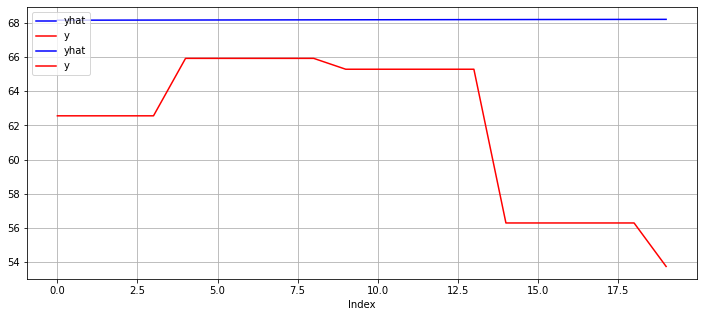

In [130]:
plt.figure(figsize=(12,5))
plt.xlabel('Index')

ax1 = df1.yhat.plot(color='blue', grid=True, label='yhat')
ax2 = df2.y.plot(color='red', grid=True, label='y')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [94]:
df2

,ds,y
0,2022-07-11 18:00:15,56.290909
1,2022-07-11 18:00:30,69.636364
2,2022-07-11 18:00:45,64.236364
3,2022-07-11 18:01:00,67.636364
4,2022-07-11 18:01:15,67.963636
...,...,...
295,2022-07-11 19:14:00,62.127273
296,2022-07-11 19:14:15,53.800000
297,2022-07-11 19:14:30,51.290909
298,2022-07-11 19:14:45,49.690909


19:51:24 - cmdstanpy - INFO - Chain [1] start processing
19:51:31 - cmdstanpy - INFO - Chain [1] done processing


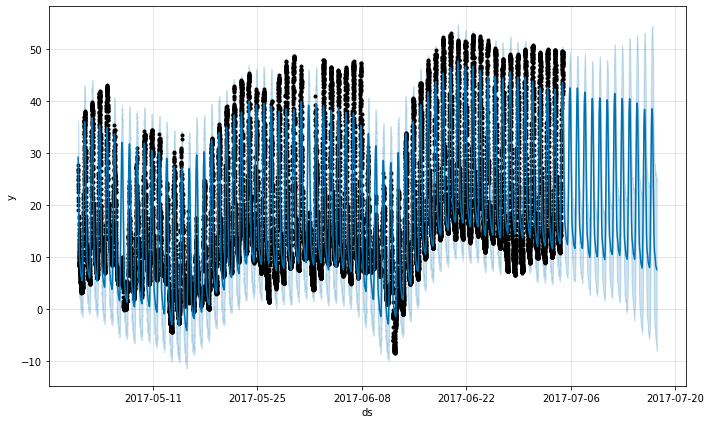

In [113]:
df_11 = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_yosemite_temps.csv')
m = Prophet(changepoint_prior_scale=0.01).fit(df_11)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

In [114]:
len(df_11)

18721